In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("../file.csv")

In [2]:
from rpy2.robjects import numpy2ri
import rpy2.robjects.packages as rpackages
import rpy2.robjects as ro

In [3]:
isingfit_r = rpackages.importr("IsingFit")
 
isingfit_func = isingfit_r.IsingFit

In [4]:
X = data.values

In [5]:
numpy2ri.activate()
nr,nc = X.shape
Xr = ro.r.matrix(X)
ro.r.assign("X", Xr)

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

In [6]:
Res = isingfit_func(X, family='binomial', plot=False)

  |======================================================================| 100%


In [7]:
adjacency_matrix = Res[0]

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.DiGraph()
for i in range(6): 
    for j in range( 6): 
        if adjacency_matrix[i][j] > 0: 
            print(adjacency_matrix[i][j])
            G.add_edge(i,j, weight=adjacency_matrix[i][j])

0.8717065192960445
1.8563003837091752
1.0548992668605752
0.8717065192960445
1.8563003837091752
0.5289083695372107
2.0624642582354786
1.0548992668605752
0.5289083695372107
1.7198729416315264
1.7198729416315264
1.835899564127117
2.0624642582354786
1.835899564127117


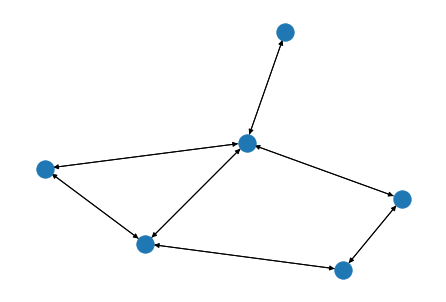

In [9]:
import matplotlib.pyplot as plt 
nx.draw( G ) 
plt.show() 